
<h1 align="center">Used Car Price Prediction</h1> 

<h3 align="center">Random Forest Regressor</h3> 

---------------------------------------------------------------------------------------------------------------------------

Importing relevent library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [2]:
# Loding the data.
car = pd.read_csv('data\Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Now I will create dictionary for every categoriacl column for gtting their dummy number for there categorcal label. It will be used in later stage in time of web app creation 

In [3]:
# creating dictionary for every categoricla column
brand_dic = dict()
body_dic = dict()
engine_type_dic = dict()
registration_dic = dict()
model_dic =dict()

In [4]:
# Creating encoding column for categorical columns only
from sklearn.preprocessing import LabelEncoder
# creating an instance of the labelEncoder
le = LabelEncoder()


# Brand column
car['brand_enc'] = le.fit_transform(car['Brand'])
for num, lbl in enumerate(le.classes_):
  brand_dic[lbl] = num
print('Brand Label saved')

# Body column
car['body_enc'] = le.fit_transform(car['Body'])
for num, lbl in enumerate(le.classes_):
  body_dic[lbl] = num
print('Body label saved')


# Engine type
car['engine_type_enc'] = le.fit_transform(car['Engine Type'])
for num, lbl in enumerate(le.classes_):
  engine_type_dic[lbl]=num
print('Engine type label saved')

# Registration column
car['regis_enc'] = le.fit_transform(car['Registration'])
for num, lbl in enumerate(le.classes_):
  registration_dic[lbl]=num
print('Registration label saved')

# Model
car['model_enc'] = le.fit_transform(car['Model'])
for num, lbl in enumerate(le.classes_):
  model_dic[lbl]=num
print('Model label saved')

# droping the old categorical column
car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

car_2.head()

Brand Label saved
Body label saved
Engine type label saved
Registration label saved
Model label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


### Now as It known theat tree based model are very powerfull and also the ensemble approch `RandomForest` is very powerfull and mostely used machine learning algorithms. the main advantage it is not required longer data preprocessing. and aldo gives better result.

In [5]:
# takking X and y
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [7]:
# importing RandomForest Regressior
from sklearn.ensemble import  RandomForestRegressor

# creating instance of randomforest regressor
rf_1 = RandomForestRegressor()

# checking the hyperparameter of the randomforest 
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# first i will create a base model then i will go for hyperparameter tuning.
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
# checking the perofrmance on the training
y_pred_train = rf_1.predict(X_train)

# importing the rmse from sklearn
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


RMSE on Traning data 2010.1866132389232


In [10]:
# error on testing data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

RMSE on Testing data 5031.941586603669


In [11]:
# chceking the socre on traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

Traning Score: 0.9885815641643751


In [12]:
# chceking the socre for testing.

y_pred_test = rf_1.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

Testing Score: 0.937492413904618


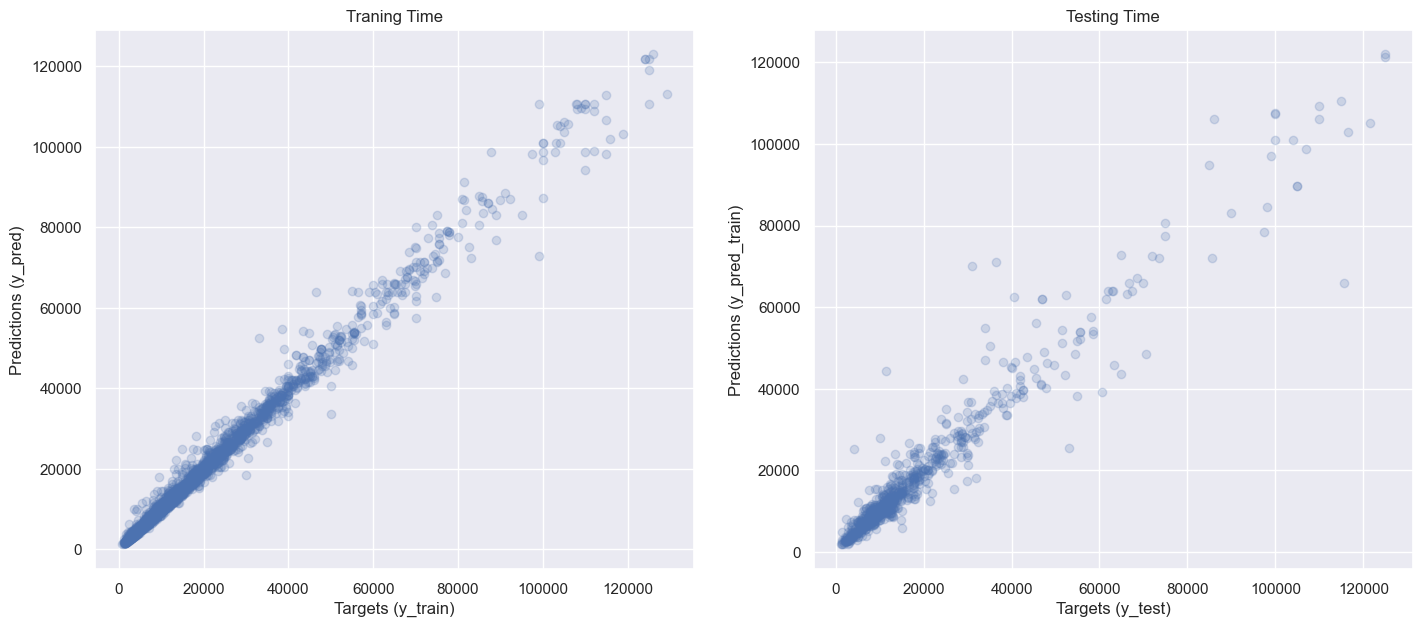

In [13]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


## Checking the residual for base model.

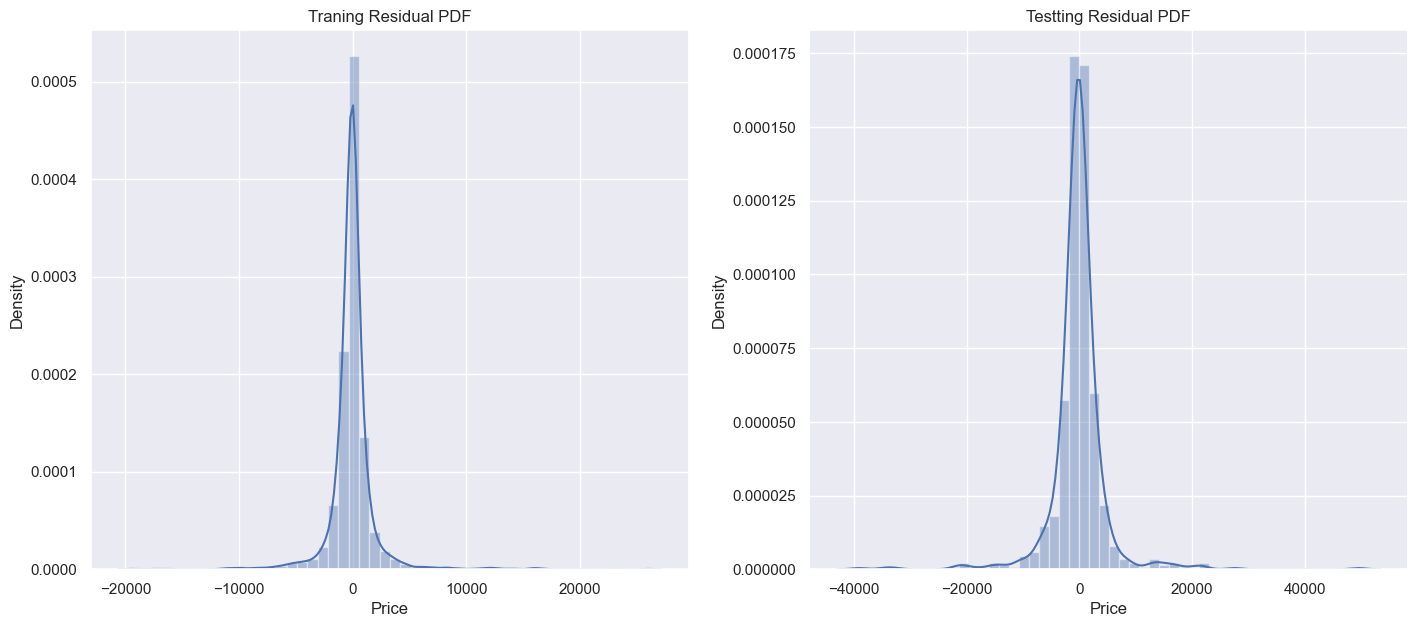

In [14]:
# plotting the distribution of the residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

In [15]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data 
df_eval

,Prediction,Tareget,Residual,Difference%
0,17454.670000,19000.0,1545.330000,8.133316
1,6324.640000,5500.0,-824.640000,14.993455
2,25595.960000,19200.0,-6395.960000,33.312292
3,12605.450000,11900.0,-705.450000,5.928151
4,8963.440000,7750.0,-1213.440000,15.657290
...,...,...,...,...
769,102952.000000,116500.0,13548.000000,11.629185
770,10965.303333,13200.0,2234.696667,16.929520
771,28315.042857,27500.0,-815.042857,2.963792
772,14890.360000,16500.0,1609.640000,9.755394


In [16]:
# description of the eval_df
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18778.531440,18602.017829,-176.513611,17.090705
std,19402.273477,20139.559184,5032.096465,29.445548
min,1846.870000,1200.000000,-39133.530000,0.003243
25%,7803.417500,7500.000000,-1291.477500,4.079912
50%,11838.625000,11900.000000,-143.610000,9.649592
75%,21732.137500,20999.060000,1037.245000,20.624722
max,121926.980000,125000.000000,49533.868333,512.852927


### Now I will tune the hyperparameter to make more generalize model.

In [17]:
# starting hyperparameter tuning

# performing hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# creating instance of RandomForest 
rf_random = RandomForestRegressor()

# creating random parameter
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None], # maximum number of levels in each decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [100,200]} # how many decision trees

# create an instance of randomsearch csv
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

# starting the search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [18]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 np.float64(0.9269749631812155))

In [19]:
# checkig score of the randomly tune parameter
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

np.float64(630.1823569573143)

In [20]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

np.float64(4169.287178547812)

Looks like the model is still on overfit. It make traning error is `630` and testing error `4177`.

Now I will try with `GridSearchCV`

In [21]:
# importing gridseach cv
from sklearn.model_selection import GridSearchCV

# create an instance of new model
rf_grid_model = RandomForestRegressor()


param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [22]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                       n_estimators=150),
 {'bootstrap': False,
  'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.9280632981854358))

In [23]:
# checkig score of the randomly tune parameter
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_grid.predict(X_train)))

np.float64(630.1938395017547)

In [24]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

np.float64(4169.287178547812)

Looks like the problem arise on the total no of Decision tree on the internal model. The `n_estimators` hypaer parametr is want ot decrease to lowereing the variance.

As i notice the all parametr works great but lower the `n_estimators`. The traning error is increased. So here i need to increase liitle bit traning error for lowering the variance.

#### Again i will try GridSearchCV for find the best model

In [25]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


# fitting on data
rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [26]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                       n_estimators=80),
 {'bootstrap': False,
  'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 80},
 np.float64(0.9282788713169318))

In [27]:
# Checking traning error.
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

np.float64(630.1736399132258)

In [28]:
# checking testing error
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

np.float64(4140.774398806163)

#### Now this model can be used, although this not that much generalize error, there is lot difference in traning error and testing error. now i will go detail evalute process with this model `rf_grid_2`

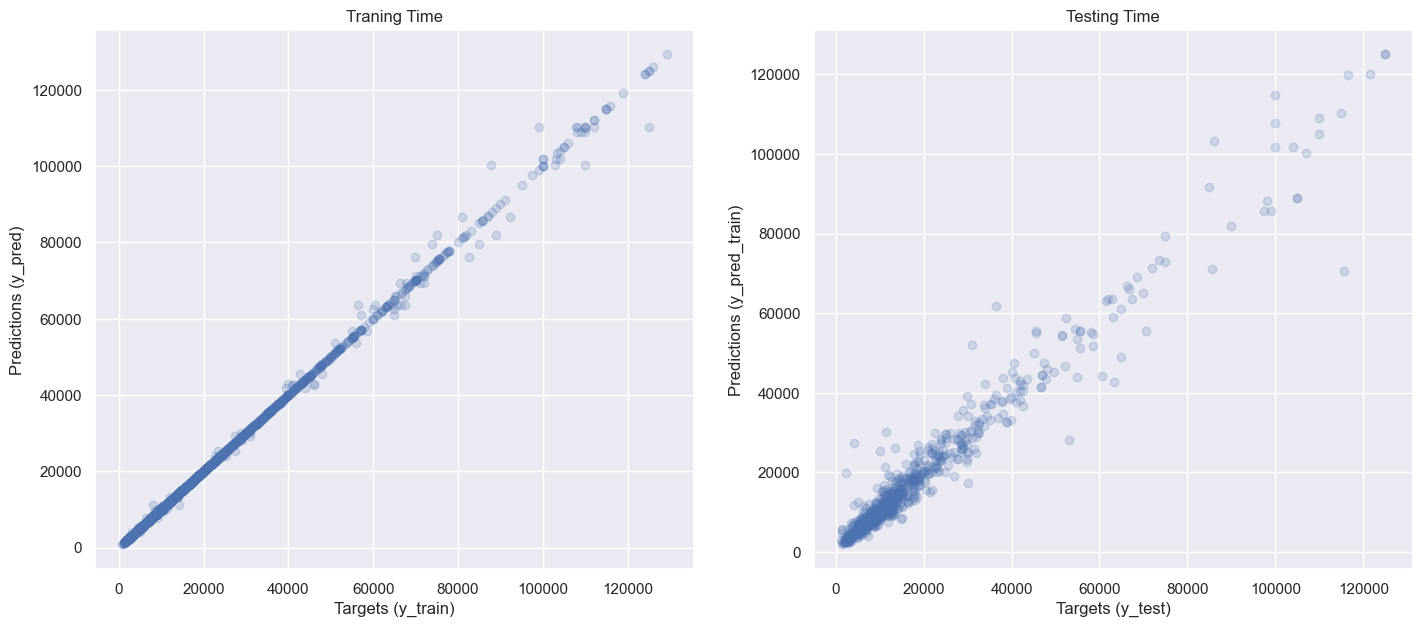

In [29]:
# plotting the traning
# check the prediction with the original values
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');


The traning error is very  lesss

In [30]:
# checking the score of the last model
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9988778411775416
Testing r2_score: 0.9576722985889486


Not that much bad model i have created, But `RandomForest` outperform from `LinearRegression`

# Now checking the residual

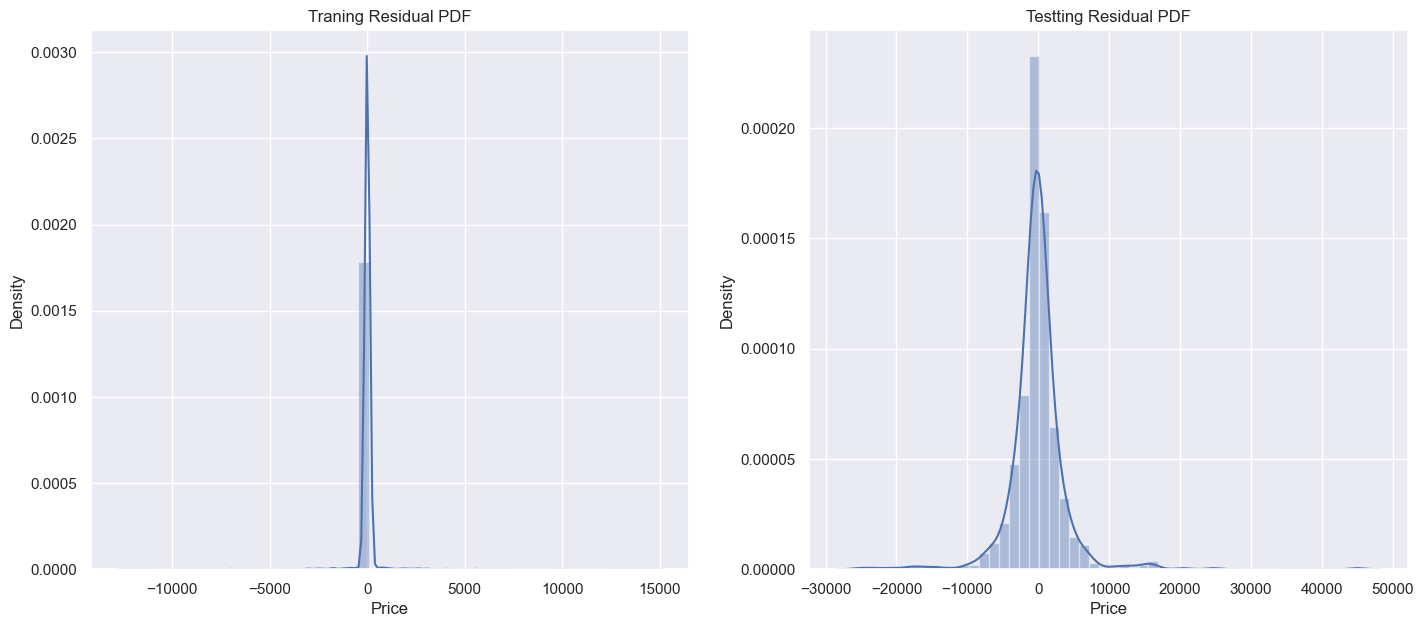

In [31]:
# plotting the distribution of the residual
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

# ploting the distribution of the residual on training
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

# ploting the distribution of the residual
plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

Not that much Bad, and far better than `Linear Regression`.

Most of the data are lie on `0`, it meas most of the cases it makes right decision.

Creating df_eval like `Linear Regression`

In [32]:
# Creating a dataframe to compare the result and prediction.
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data 
df_eval

,Prediction,Tareget,Residual,Difference%
0,18037.037500,19000.0,962.962500,5.068224
1,5046.875000,5500.0,453.125000,8.238636
2,24496.225000,19200.0,-5296.225000,27.584505
3,12201.537500,11900.0,-301.537500,2.533929
4,8239.350000,7750.0,-489.350000,6.314194
...,...,...,...,...
769,119881.250000,116500.0,-3381.250000,2.902361
770,11170.150000,13200.0,2029.850000,15.377652
771,28266.666667,27500.0,-766.666667,2.787879
772,14179.262500,16500.0,2320.737500,14.065076


In [33]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18708.594383,18602.017829,-106.576553,17.900481
std,19357.713434,20139.559184,4142.079248,40.179495
min,1851.725000,1200.000000,-25177.062500,0.000000
25%,7852.656250,7500.000000,-1316.453125,4.684331
50%,11899.206250,11900.000000,-161.868750,10.114683
75%,21816.459375,20999.060000,1074.309688,20.154035
max,125000.000000,125000.000000,45058.100000,721.521875


The `Difference%` column is only interest, the differenc is far better than `Linear Regression`

### The above model is overfit , choose to use the first base model.

In [34]:
import joblib

# saving the first base model.
joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']